<h1> BASIC OF MACHINE LEARNING </h1>

In [ ]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('datasets\\titanic.csv') 

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

In [27]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [29]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7622377622377622


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

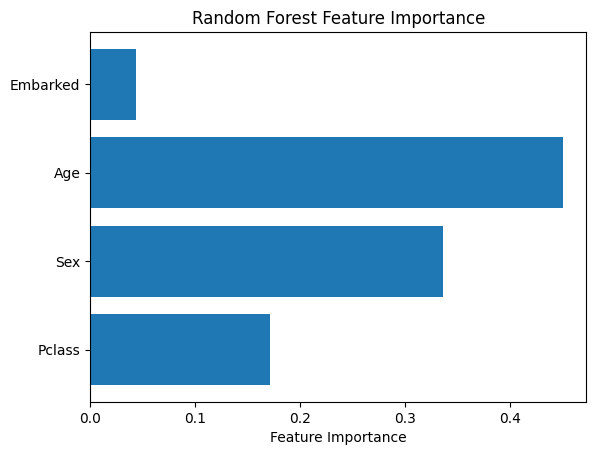

In [30]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


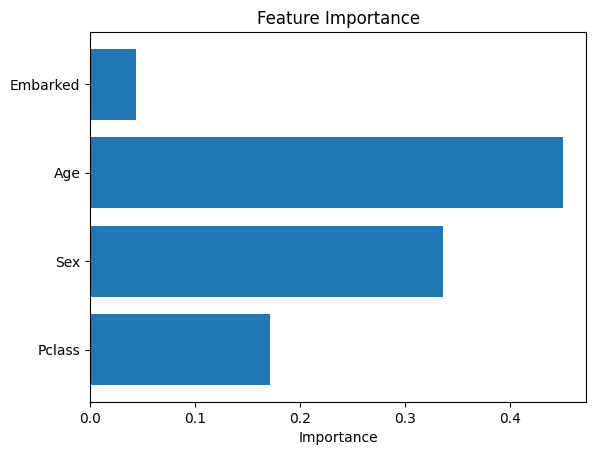

In [31]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

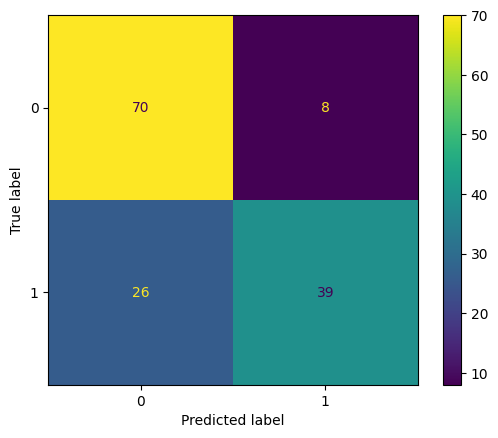

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h1>Manual Testinjg</h1>

In [33]:
# [Pclass=3, Sex=0 (male), Age=22]
model.predict([[3, 0, 22 , 22.45 ]])

array([0])

In [34]:
if model.predict([[3, 0, 30]]) == [1]:
    print("Passenger likely survive")
elif model.predict([[1, 1, 30]]) == [0]:
    print("Passenger unlikely to survive")
else:
    print("Invalid Result")

ValueError: X has 3 features, but RandomForestClassifier is expecting 4 features as input.

<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [35]:
# Keep only useful columns

df2 = pd.read_csv("datasets\\titanic.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()


In [37]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [45]:
# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [39]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h1>selecting X and y </h1>

In [40]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7808988764044944


<h1> Manual Testing </h1>

In [44]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=7.25, Embarked=0 (S)]
model.predict([[3, 0, 22, 7.25, 0]])

array([0])